In [14]:
from google.colab import files
uploaded = files.upload()  # Choose your downloaded dataset file here


Saving sign language digits dataset.zip to sign language digits dataset.zip


In [15]:
import zipfile

# Replace 'your_file.zip' with the actual name of the uploaded file
with zipfile.ZipFile('sign language digits dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [16]:
import os
os.listdir('/content/')


['.config',
 '.ipynb_checkpoints',
 'sign language digits dataset.zip',
 'ASL Digits',
 'sample_data']

In [25]:
import os
import shutil
import random

# Path to your dataset
dataset_dir = '/content/ASL Digits/asl_dataset_digits'  # Adjust this path accordingly

# Create directories for train and validation data
for i in range(10):  # Loop over digits 0-9
    os.makedirs(f'/content/train/{i}', exist_ok=True)
    os.makedirs(f'/content/val/{i}', exist_ok=True)

# Loop through each digit (0-9)
for i in range(10):
    # Get all images in the current digit folder
    all_images = [img for img in os.listdir(os.path.join(dataset_dir, str(i)))]

    # Shuffle the list of images
    random.shuffle(all_images)

    # Split into train and validation (80% train, 20% validation)
    train_images = all_images[:int(0.8 * len(all_images))]
    val_images = all_images[int(0.8 * len(all_images)):]

    # Move images to respective folders
    for img in train_images:
        shutil.move(os.path.join(dataset_dir, str(i), img), os.path.join('/content/train', str(i), img))

    for img in val_images:
        shutil.move(os.path.join(dataset_dir, str(i), img), os.path.join('/content/val', str(i), img))

print("Dataset organized for training and validation.")


Dataset organized for training and validation.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully Connected Layer (Dense Layer)
model.add(Dense(128, activation='relu'))

# Output Layer (Softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))  # 10 for digits 0 to 9

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,642 (40.58 MB)

 Trainable params: 10,637,642 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Set up ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Directory containing training data
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels (0-9)
)

val_generator = val_datagen.flow_from_directory(
    '/content/val',  # Directory containing validation data
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels (0-9)
)

# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Output Layer for Multi-Class Classification
model.add(Dense(10, activation='softmax'))  # 10 classes, softmax for multi-class

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs, adjust as necessary
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)



Found 450 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,642 (40.58 MB)

 Trainable params: 10,637,642 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3817 - loss: 1.9857 - val_accuracy: 0.7812 - val_loss: 0.4282
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7812 - loss: 0.4345 - val_accuracy: 0.9167 - val_loss: 0.2596
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9569 - loss: 0.1336 - val_accuracy: 0.9688 - val_loss: 0.1639
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9688 - loss: 0.3273 - val_accuracy: 0.9583 - val_loss: 0.2271
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9901 - loss: 0.0458 - val_accuracy: 0.9792 - val_loss: 0.0739
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9167 - val_loss: 0.1080
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9688 - val_loss: 0.1046
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 1.0000 - loss: 4.0367e-04 - val_accuracy: 1.0000 - 

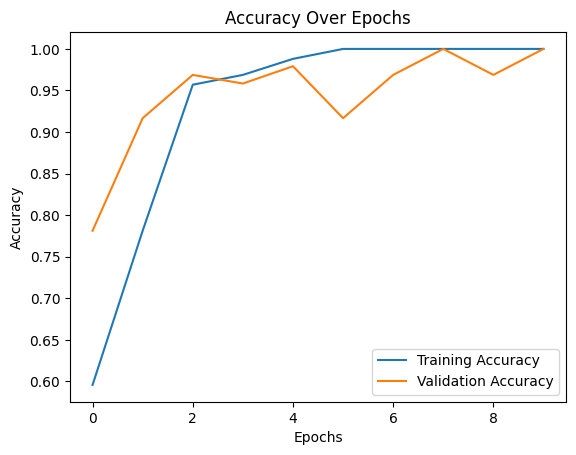

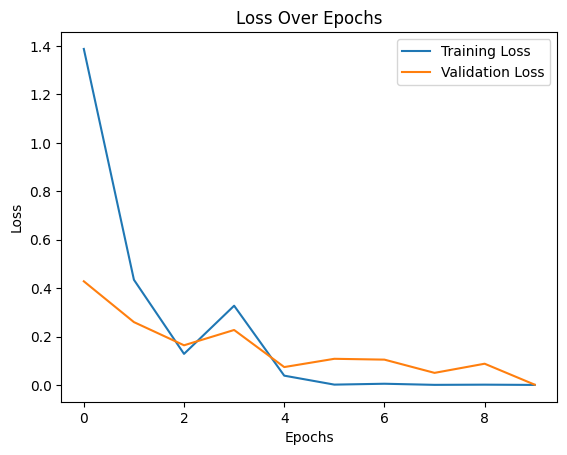

In [30]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the accuracy plot
plt.savefig(r"/content/Accuracy.pdf")  # Change path if needed
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Save the loss plot
plt.savefig(r"/content/Loss.pdf")  # Change path if needed
plt.show()


In [33]:
# Save the trained model
model.save('/content/asl_digit_classifier.h5')  # Change path if needed


In [36]:
# import matplotlib.pyplot as plt  # Missing import for plotting images
# from tensorflow.keras.models import load_model
# import numpy as np
# import os
# from tensorflow.keras.preprocessing import image

# # Load the trained model
# model = load_model('/content/asl_digit_classifier.h5')  # Change path if needed

# # Function to classify and display image
# def classify_and_display_image(img_path):
#     # Load the image
#     img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input size of the model
#     img_array = image.img_to_array(img)  # Convert image to array
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

#     # Normalize the image (if the model was trained with normalization)
#     img_array = img_array / 255.0

#     # Predict the class (digit 0-9)
#     prediction = model.predict(img_array)
#     class_idx = np.argmax(prediction, axis=1)  # Get the index of the max value (digit 0-9)
#     class_label = str(class_idx[0])  # Get the class label (digit as string)

#     # Display the image and prediction result
#     plt.imshow(img)
#     plt.title(f'Prediction: {class_label}')
#     plt.axis('off')  # Turn off axes for better presentation
#     plt.show()

# # Path to the folder containing images to classify
# image_folder = '/content/val'  # Change to the path where your test images are

# # Loop through all images in the folder and classify them
# for filename in os.listdir(image_folder):
#     if filename.endswith(('.jpg', '.jpeg', '.png')):  # Image file extensions
#         img_path = os.path.join(image_folder, filename)
#         classify_and_display_image(img_path)


In [38]:
import matplotlib.pyplot as plt  # Importing for plotting images
from tensorflow.keras.models import load_model
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/asl_digit_classifier.h5')  # Change path if needed

# Function to classify and display image
def classify_and_display_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input size of the model
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Normalize the image (if the model was trained with normalization)
    img_array = img_array / 255.0

    # Predict the class (digit 0-9)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)  # Get the index of the max value (digit 0-9)
    class_label = str(class_idx[0])  # Get the class label (digit as string)

    # Display the image and prediction result
    plt.imshow(img)
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')  # Turn off axes for better presentation
    plt.show()

# Path to the folder containing images to classify (train/val with subfolders for digits)
image_folder = '/content/val'  # Change to the path where your test images are (it should contain subfolders)

# Check if images are found in the folder
print(f"Images in {image_folder}:")
image_files = []
# Loop through subfolders (0-9) and get the image files
for subfolder in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Image file extensions
                image_files.append(os.path.join(subfolder_path, filename))

# Print image files list to verify
print(image_files)

# If the list is empty, it means no valid images were found in the folder
if not image_files:
    print(f"No images found in {image_folder}. Please check the folder path.")
else:
    # Loop through all images in the list and classify them
    for img_path in image_files:
        print(f'Classifying {img_path}')  # Check which file is being processed
        classify_and_display_image(img_path)


Output hidden; open in https://colab.research.google.com to view.